# Plotting words in narrative time

Here's we'll use a new kind of object—a numpy Array—to bin together a numeric representation of token occurrence in narrative time. This is basically like creating what the NLTK calls a lexical dispersion plot, but we'll be making it ourselves. 

First, as usual, import all the libraries we need to import: 

In [1]:
import nltk
from nltk import word_tokenize
import pandas as pd
import numpy as np
%matplotlib inline

We'll start by loading the file, as usual, and tokenizing it. I'm also lowercasing the file here, so that our searches will be case-insensitive. 

In [2]:
moonstone = open('/home/jon/Code/course-computational-literary-analysis/moonstone.md').read().lower()
moonstoneTokens = word_tokenize(moonstone)

Now we'll just create a binary representation of whether each token is an exclamation point or not. If it is, write "1," and if it isn't, write "0." To do this, we'll use a list comprehension: 

In [3]:
isEx = [1 if token is "!" else 0 for token in moonstoneTokens]

How many exclamation points are there? 

In [4]:
sum(isEx)

992

Convert this to a Numpy array, so that we can work with it easier. 

In [5]:
isExArray = np.array(isEx)
isExArray

array([0, 0, 0, ..., 0, 0, 0])

Now we can split this into 10 boxes along narrative time. The first will represent the first 10th of the novel (i.e. the first 100 pages of a 1,000 page novel), and so on. 

In [6]:
exBoxes = np.array_split(isExArray, 10)

Now we can take the sum of each box, to determine the number of exclamation points in each tenth of the novel. 

In [9]:
exSums = [np.sum(box) for box in exBoxes]
exSums

[70, 86, 75, 94, 133, 142, 93, 134, 79, 86]

Then plot the results using Pandas. 

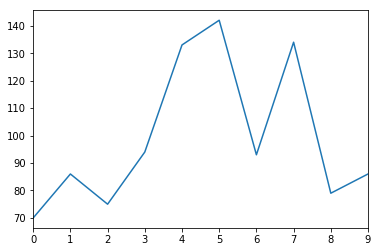

In [10]:
pd.Series(exSums).plot()

Here's all that code in a function: 

In [15]:
def narrativeTime(word, nBoxes=10): 
    binary = [1 if token.lower() == word.lower()
              else 0 for token in moonstoneTokens]
    array = np.array(binary)
    split = np.array_split(array, nBoxes)
    sums = [np.sum(box) for box in split]
    pd.Series(sums).plot()

Now we can feed lots of new parameters to that function, to plot them in narrative time, and with varying degrees of granularity:  

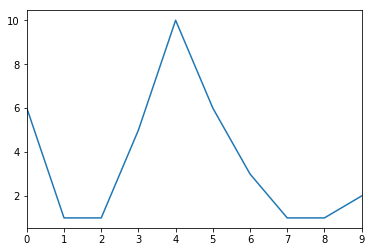

In [16]:
narrativeTime('true', 10)